# __Explorar datos preprocesados__

In [1]:
# visualizacion de informacion
%matplotlib inline
import pandas as pd

In [2]:
# cargar datos preprocesados
compras_df = pd.read_csv('../data_out/clean_compras.csv')
compras_df.head()

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


## Visualizacion general del dataset

In [3]:
# lista de nombre de las columnas
compras_df.columns

Index(['NUM BEN', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [4]:
# comprobar el tipo de dato de las variables
compras_df.dtypes

NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
# OP            float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [5]:
# resumen estadistico de las variables numericas
compras_df.describe()

,NUM BEN,# OP,IMPORTE
count,1540.000000,1.540000e+03,1.540000e+03
mean,203914.777273,1.920050e+08,6.263179e+05
std,92435.932025,1.411189e+08,4.666912e+06
min,110152.000000,1.019042e+06,8.600000e-01
25%,116223.000000,1.019144e+06,2.987000e+03
50%,203013.000000,2.980000e+08,1.235584e+04
75%,311250.000000,3.000001e+08,1.130583e+05
max,370012.000000,6.040001e+08,1.267303e+08


In [6]:
# resumen estadistico de las variables categoricas
compras_df.describe(include='object')

,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,FECHA,SHEET
count,1540,1540,1540,1540,1540,1540,1540,1540
unique,301,301,1540,656,1396,2,21,5
top,CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUC...,CMI970416U95,LLS AF8458-158008-3972,NO APLICA,SERVICIOS FUNERARIOS ASISTENCIA SOCIAL DIF,TR,2020-12-04,CONTRATISTAS Y FDO FED
freq,266,266,1,238,27,1395,521,724


In [7]:
# seleccionar variables con las que vamos a trabajar
compras_df = compras_df[['BENEFICIARIO', 'FACTURA', 'CONTRATO', 'CONCEPTO', 'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET']]

## Analisis unidimensional de las variables

In [8]:
# conteo de los valores de SHEET
compras_df['SHEET'].value_counts()

CONTRATISTAS Y FDO FED    724
GASTOS VARIOS             690
COMUNICACION               71
SERV. PERS.                46
SERV PPROF                  9
Name: SHEET, dtype: int64

In [9]:
# valores unicos de la variable CONCEPTO
len(compras_df['CONCEPTO'].unique())

1396

In [10]:
# primero 10 valores de la variable BENEFICIARIO
compras_df['BENEFICIARIO'].value_counts()[0:10]

CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                      101
CAR ONE MONTERREY, S.A. DE C.V.                        78
PEREZ RIOS RAMIRO                                      58
S.I.M.E.P.R.O.D.E.                                     50
INTERASFALTOS, S.A. DE C.V.                            45
GRUPO COYOTE MONTERREY, S.A. DE C.V.                   43
SERVICIO TECNICO CHURUBUSCO, S.A. DE C.V.              30
CFE SUMINISTRADOR DE SERVICIOS BASICOS                 29
CORDERO MACIAS SILVESTRE GUADALUPE                     27
Name: BENEFICIARIO, dtype: int64

<AxesSubplot:>

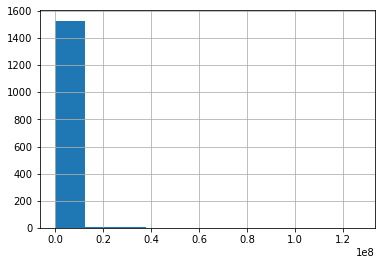

In [11]:
# comportamiento del IMPORTE
compras_df['IMPORTE'].hist()

<AxesSubplot:>

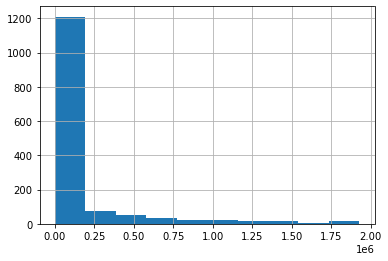

In [12]:
# obtener solo los valores centrales de IMPORTE
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

<AxesSubplot:>

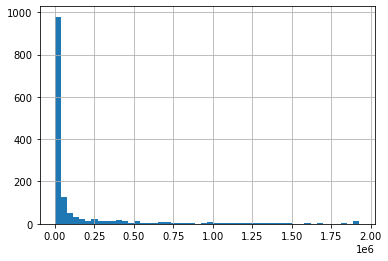

In [13]:
# obtener solo los valores centrales de IMPORTE
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50)

In [14]:
# obtener los primeros registros filtrados
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)].head()

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


## Analisis multidimensional de las variables

In [15]:
# proveedores o beneficiarios con pagos mas grandes
sum_importe_beneficiario = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']
sum_importe_beneficiario

BENEFICIARIO
235 PROYECTOS, S.A. DE C.V.                   1649292.36
ABC Y CONSTRUCCIONES, SA. DE CV.              1311087.90
ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.       5914.30
ADQUISICIONES INTELIGENTES, S.A. DE C.V.      2132196.00
ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.          450859.52
                                                 ...    
VILLARREAL CARDENAS JUAN IGNACIO                 3733.13
VILLARREAL CARDENAS NANCY ESTHER                81461.14
VILLARREAL DE LEON BERTHA                       11004.05
VIVERO EL ESCORIAL, S.A. DE C.V.              2511255.46
ZAPATA CHAVIRA HOMERO ARTURO                    28350.00
Name: IMPORTE, Length: 301, dtype: float64

<AxesSubplot:ylabel='BENEFICIARIO'>

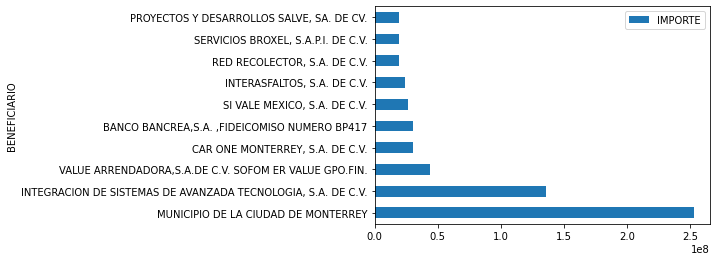

In [17]:
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(
        kind='barh', 
        x='BENEFICIARIO', 
        y='IMPORTE'
        )

In [18]:
# gasto promedio por hoja
mean_importe_sheet = compras_df.groupby('SHEET').mean()['IMPORTE']
mean_importe_sheet

SHEET
COMUNICACION              109705.343662
CONTRATISTAS Y FDO FED    474566.765787
GASTOS VARIOS             881659.731797
SERV PPROF                229592.166667
SERV. PERS.                59623.405217
Name: IMPORTE, dtype: float64

<AxesSubplot:ylabel='SHEET'>

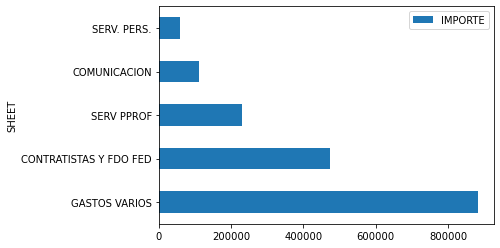

In [21]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).plot(
    kind='barh',
    x='SHEET',
    y='IMPORTE'
)

In [22]:
# gastos por fecha
sum_importe_fecha = compras_df.groupby('FECHA').sum()['IMPORTE']
sum_importe_fecha

FECHA
2020-12-01    2.453181e+04
2020-12-02    3.000000e+04
2020-12-03    1.313241e+05
2020-12-04    7.432247e+07
2020-12-07    1.815018e+06
2020-12-08    1.519824e+08
2020-12-09    4.659596e+05
2020-12-10    1.207010e+06
2020-12-11    1.127524e+08
2020-12-14    3.692338e+05
2020-12-15    1.826510e+04
2020-12-16    2.504067e+06
2020-12-17    1.735205e+08
2020-12-18    1.568875e+08
2020-12-21    9.441760e+05
2020-12-22    6.814845e+07
2020-12-23    3.328571e+07
2020-12-28    1.204764e+08
2020-12-29    2.050000e+05
2020-12-30    6.435889e+07
2020-12-31    1.080281e+06
Name: IMPORTE, dtype: float64

In [26]:
# obtener solo los regisros de la hoja 'GASTOS VARIOS'
compras_gastos_df = compras_df[compras_df['SHEET'] == 'GASTOS VARIOS']
compras_gastos_df.sample(5)

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
487,SECRETARIA DE FINANZAS Y TESORERIA GRAL DEL ED...,547/2014-24-2020-158004-1753,NO APLICA,DESCUENTO JUDICIAL MERCANTIL A MARIA DOLORES C...,CH,1104592.0,2020-12-23,1601.56,GASTOS VARIOS
576,GARCIA ZAVALA EDGAR ALEJANDRO JOBERAGAN,786-158008-4682,OT. 20205260,"AFINACION DE MOTOR, REEMPLAZO E INSTALACION DE...",TR,1019076.0,2020-12-04,8865.88,GASTOS VARIOS
333,PEREZ RIOS RAMIRO,3509-158008-3872,OT. 20204320,RENOVACION DE PINTURA EN COLOR BLANCO DIRECTO ...,TR,1019098.0,2020-12-11,9164.00,GASTOS VARIOS
84,"TRACTORES Y MAQUINARIA REAL, S.A. DE C.V.",A112941-158008-4524,OT. 20205099,"MANTENIMIENTO DE 250 HORAS, REEMPLAZO E INSTAL...",TR,1019069.0,2020-12-04,17744.26,GASTOS VARIOS
206,"SI VALE MEXICO, S.A. DE C.V.",121000128345-158004-1723,SAD-567-2019,COMISION E IVA BONOS DE DESPENSA POR DESEMPEÑO...,TR,299001452.0,2020-12-18,41190.15,GASTOS VARIOS


<AxesSubplot:>

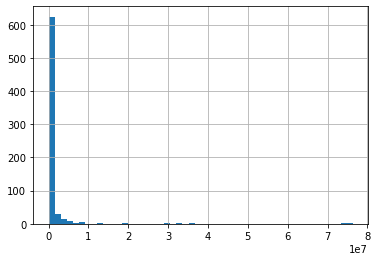

In [27]:
compras_gastos_df['IMPORTE'].hist(bins=50)

In [31]:
# de los registros de GASTOS VARIOS obtener solo aquellos beneficiarios que sean de Monterrey
compras_gastos_df[compras_gastos_df['BENEFICIARIO'] == 'MUNICIPIO DE LA CIUDAD DE MONTERREY']

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
367,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,73864368.92,GASTOS VARIOS
368,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-B-158004-1735,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,231000103.0,2020-12-17,76352493.81,GASTOS VARIOS
369,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-C-158004-1733,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,240000108.0,2020-12-17,19246138.70,GASTOS VARIOS
370,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1760,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCA ...",TR,11000197.0,2020-12-28,36101891.39,GASTOS VARIOS
371,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1780,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,11000198.0,2020-12-28,27443.46,GASTOS VARIOS
372,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1761,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,231000104.0,2020-12-28,33579364.01,GASTOS VARIOS
373,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1781,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,231000105.0,2020-12-28,132688.02,GASTOS VARIOS
374,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1759,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,240000109.0,2020-12-28,13362855.08,GASTOS VARIOS
375,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1779,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,240000110.0,2020-12-28,17925.96,GASTOS VARIOS
376,MUNICIPIO DE LA CIUDAD DE MONTERREY,158002-470,NO APLICA,FINIQUITO DE FONDO OPERATIVO DE LA SECRETARÍA ...,CH,299000198.0,2020-12-30,1439.20,GASTOS VARIOS


In [32]:
# obtener solo aquellos beneficiarios que sean de Monterrey de todas las hojas
compras_df[compras_df['BENEFICIARIO'] == 'MUNICIPIO DE LA CIUDAD DE MONTERREY']

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
367,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,73864368.92,GASTOS VARIOS
368,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-B-158004-1735,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,231000103.0,2020-12-17,76352493.81,GASTOS VARIOS
369,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-C-158004-1733,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,240000108.0,2020-12-17,19246138.70,GASTOS VARIOS
370,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1760,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCA ...",TR,11000197.0,2020-12-28,36101891.39,GASTOS VARIOS
371,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1780,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,11000198.0,2020-12-28,27443.46,GASTOS VARIOS
372,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1761,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,231000104.0,2020-12-28,33579364.01,GASTOS VARIOS
373,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1781,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,231000105.0,2020-12-28,132688.02,GASTOS VARIOS
374,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1759,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,240000109.0,2020-12-28,13362855.08,GASTOS VARIOS
375,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1779,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,240000110.0,2020-12-28,17925.96,GASTOS VARIOS
376,MUNICIPIO DE LA CIUDAD DE MONTERREY,158002-470,NO APLICA,FINIQUITO DE FONDO OPERATIVO DE LA SECRETARÍA ...,CH,299000198.0,2020-12-30,1439.20,GASTOS VARIOS


In [34]:
# contabilizar por hoja los beneficiarios que sean de Monterrey
compras_df[compras_df['BENEFICIARIO'] == 'MUNICIPIO DE LA CIUDAD DE MONTERREY']['SHEET'].value_counts()

GASTOS VARIOS             11
CONTRATISTAS Y FDO FED     5
Name: SHEET, dtype: int64

In [37]:
# obtener el top 10 de los beneficiarios con mayores gastos
top_beneficiarios = compras_df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]

In [35]:
# agrupar registros por beneficiario y hoja
compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()

,,# OP,IMPORTE
BENEFICIARIO,SHEET,,
"235 PROYECTOS, S.A. DE C.V.",GASTOS VARIOS,5.980030e+08,1649292.36
"ABC Y CONSTRUCCIONES, SA. DE CV.",CONTRATISTAS Y FDO FED,1.012000e+09,1311087.90
"ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.",GASTOS VARIOS,1.104599e+06,5914.30
"ADQUISICIONES INTELIGENTES, S.A. DE C.V.",CONTRATISTAS Y FDO FED,6.020001e+08,2132196.00
"ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.",GASTOS VARIOS,2.990002e+08,450859.52
...,...,...,...
VILLARREAL CARDENAS JUAN IGNACIO,SERV. PERS.,2.990002e+08,3733.13
VILLARREAL CARDENAS NANCY ESTHER,SERV. PERS.,3.001047e+08,81461.14
VILLARREAL DE LEON BERTHA,GASTOS VARIOS,1.104610e+06,11004.05


In [38]:
# agrupa los beneficiarios por hoja
compras_sheet_beneficiario = compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')
compras_sheet_beneficiario.sample(10)

SHEET,COMUNICACION,CONTRATISTAS Y FDO FED,GASTOS VARIOS,SERV PPROF,SERV. PERS.
BENEFICIARIO,,,,,
"M.S. COMERCIALIZADORA E IMPORTADORA, S.A. DE C.V.",NaN,NaN,1819675.49,NaN,NaN
CHAO CASTRUITA CARMEN,NaN,NaN,12368.33,NaN,NaN
"PICO INFRAESTRUCTURA URBANA, SA. DE CV.",NaN,6092976.55,NaN,NaN,NaN
"CONSTRUCTORA Y COMERCIALIZADORA IMPERIAL, SA DE CV.",NaN,621936.12,NaN,NaN,NaN
"EDIFICIOS DIANA DEL NORTE, S.A. DE C.V.",NaN,NaN,18000.00,NaN,NaN
"INTERLAMPARAS, S.A. DE C.V.",NaN,NaN,1413914.16,NaN,NaN
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION,NaN,411599.50,NaN,NaN,NaN
"MANTENIMIENTO ELECTRICO DE POTENCIA,S.A.DE C.V.",NaN,NaN,179881.20,NaN,NaN
"HEGV INDUSTRIAL, S.A. DE C.V.",NaN,2714890.31,5335922.98,NaN,NaN


<AxesSubplot:ylabel='BENEFICIARIO'>

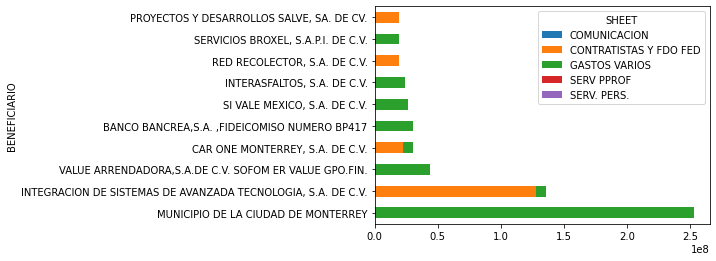

In [40]:
# obtener los datos por hoja de los top de beneficiarios y graficarlos
compras_sheet_beneficiario.loc[top_beneficiarios].plot.barh(stacked=True)

## Analisis de texto